In [10]:
from refnx.reduce import reduce_xrdml
from refnx.analysis import Objective, CurveFitter, Transform
from refnx.reflect import SLD, MaterialSLD, Slab, ReflectModel, Structure
from refnx.dataset import ReflectDataset
from refnx.util import q

import numpy as np
import matplotlib.pyplot as plt
fpath = r"op18N012_XRR.xrdml"

ref = reduce_xrdml(fpath, scale=4e6, sample_length=6)

c:\users\oliver\onedrive - unsw\code\refnx\refnx\reflect\reflect_model.py:171: UserWarning: Can't use the C abeles backend
  warnings.warn("Can't use the C abeles backend")
c:\users\oliver\onedrive - unsw\code\refnx\refnx\reflect\reflect_model.py:174: UserWarning: Using the SLOW reflectivity calculation.
  warnings.warn("Using the SLOW reflectivity calculation.")


<IPython.core.display.Javascript object>


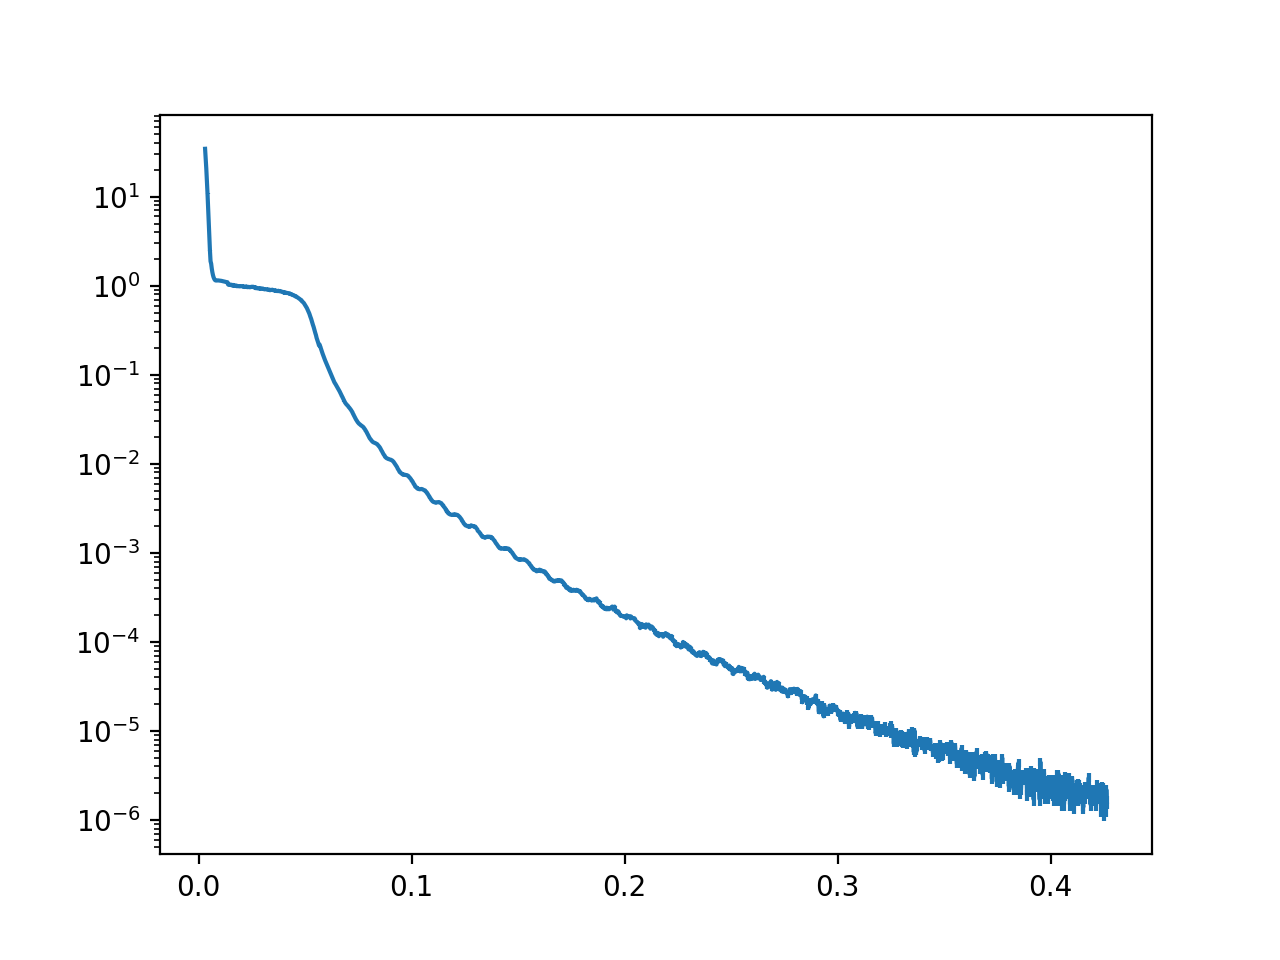

In [11]:
%matplotlib notebook
plt.style.use('default')
fig, ax  = ref.plot()

ax.set_yscale('log')

In [15]:


dataset = ReflectDataset(ref)



33it [00:10,  3.17it/s]

________________________________________________________________________________
Objective - 2848022486216
Dataset = <None>, 1490 points
datapoints = 1490
chi2 = 12.618105441251924
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1.11311 +/- 0.0178, bounds=[0.6, 1.4]>
<Parameter:     'bkg'     , value=1.062e-06 +/- 5.58e-08, bounds=[1e-09, 1e-05]>
<Parameter:'dq - resolution', value=2 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (f

<IPython.core.display.Javascript object>


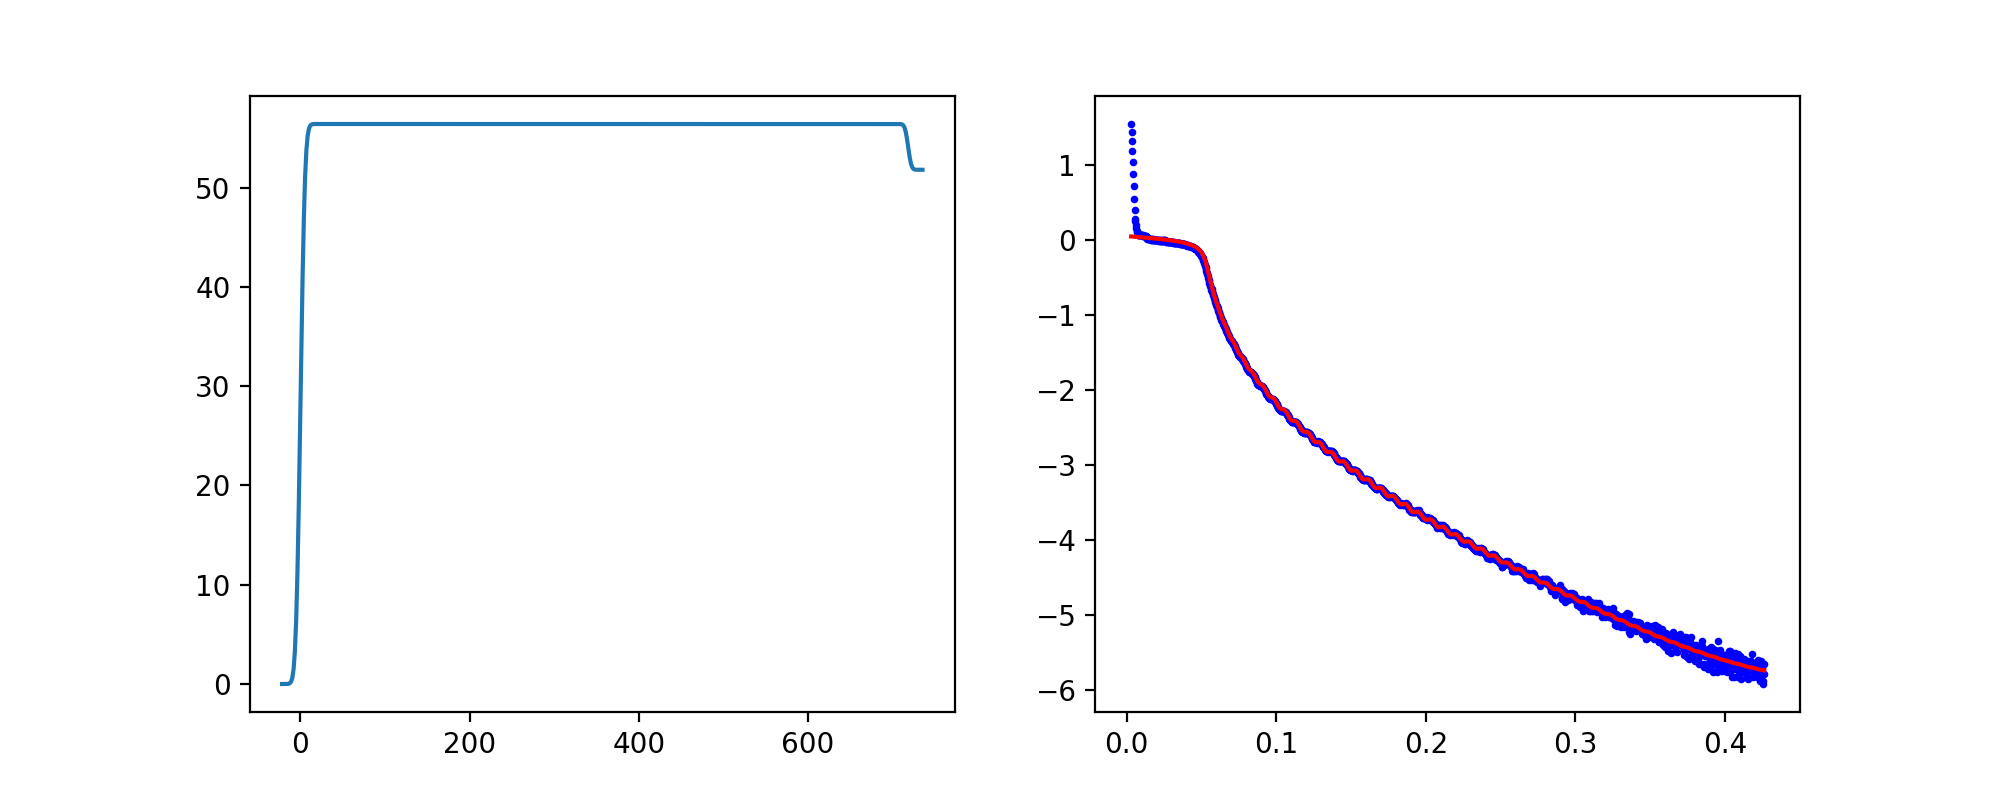

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

objective.plot(fig=fig)
ax[0].plot(*objective.model.structure.sld_profile())

In [ ]:
import xrayutilities as xu
import matplotlib.pyplot as plt
import numpy as np
import tkinter as tk
from tkinter import filedialog
import os


root = tk.Tk()
root.withdraw()
filepath = filedialog.askopenfilename()
filename = os.path.basename(filepath)
%matplotlib notebook

#file = r'C:\Users\olive\OneDrive - UNSW\Experiments 2019\Xrays\VG180301\VG180301_rockingCurve_alignment.ras'
rasFile = xu.io.rigaku_ras.RASFile(filepath)
ax1, data = xu.io.getras_scan(rasFile.filename+'%s', '', rasFile.scans[0].scan_axis)
fig, ax = plt.subplots()

#Q = 4 * np.pi/1.54 * np.sin(np.radians(ax1/2))

ax.plot(data['TwoThetaOmega'], data['int']*data['att'], label='Data', color = 'black')
ax.set_xlabel( '2Theta-omega (degrees)')
ax.set_ylabel( 'Intensity (a.u.)')
ax.set_yscale('log')
#ax.set_xlim(15,115)
#ax.set_yscale('log')
plt.savefig( filepath[:-4] + '.svg', transparent=True)

print(filename)


In [17]:
params, sd_params, itlim = xu.math.fit.peak_fit(ax1, data['int']*data['att'], iparams=[], maxit=3000, peaktype='Lorentz')

ax.plot(ax1, xu.math.Gauss1d(ax1, *params), label='Lorentz fit')
ax.legend()
fwhm = xu.math.fit.fwhm_exp(ax1, xu.math.Gauss1d(ax1, *params))
print('FWHM = ' + str(fwhm))
ax.text(16.2,10000, 'FWHM = '+ "{:.2f}".format(fwhm))
plt.savefig( filepath[:-4] + '.svg', transparent=True)

FWHM = 0.29298978564419187


In [2]:
import numpy as np
import refnx
from refnx.analysis import Objective, CurveFitter, Transform
from refnx.reflect import SLD, Slab, ReflectModel, Structure
from refnx.dataset import ReflectDataset
from refnx.util import q
print(refnx.version.version)
root = tk.Tk()
root.withdraw()
fpath = filedialog.askopenfilename()
filename = os.path.basename(filepath)
ref = reduce_xray(fpath, sample_length=5)

qvec = [q(angle/2, 1.54) for angle in data['TwoThetaOmega'] ]
qvec = np.array(qvec)
intensity = data['int']*data['att']/max(data['int']*data['att'])
intensity = np.array(intensity)
dset = np.array([[qvec], [intensity]])
dset = dset


dataset = ReflectDataset(dset)

# set up the SLD objects for each layer
air = SLD(0.0 + 0.0j, name='air')
BFO_SLD = SLD(58.057 + 5.7122j, name='BFO_SLD')
LSMO_SLD = SLD(48.227 + 4.9537j, name='LSMO_SLD')
STO_SLD = SLD(37.387 + 1.6993j, name='STO_SLD')

# set up the Slab objects for each layer
air_layer = Slab(0.0, air, 0.0, name='air')
BFO_layer = Slab(600.0, BFO_SLD, 3.0, name='BFO')
LSMO_layer = Slab(50.0, LSMO_SLD, 3.0, name='LSMO')
STO_layer = Slab(0.0, STO_SLD, 3.0, name='STO')

# set up the limits for SLD's and Slabs

# set up the Structure object from the Slabs
structure = air_layer | BFO_layer | LSMO_layer | STO_layer

STO_layer.sld.real.setp(bounds=(32, 42), vary=True)
STO_layer.rough.setp(bounds=(0, 30), vary=True)

LSMO_layer.sld.real.setp(bounds=(40,56), vary=True)
LSMO_layer.sld.imag.setp(bounds=(2,9), vary=True)
LSMO_layer.thick.setp(bounds=(30,200), vary=True)
LSMO_layer.rough.setp(bounds=(0,10), vary=True)

BFO_layer.sld.real.setp(bounds=(50,66), vary=True)
BFO_layer.sld.imag.setp(bounds=(2,9), vary=True)
BFO_layer.thick.setp(bounds=(400,800), vary=True)
BFO_layer.rough.setp(bounds=(0,10), vary=True)

# make the reflectometry model
model = ReflectModel(structure, scale=1.0, bkg=1e-07, dq=5.0)
model.scale.setp(bounds=(0.6, 1.4), vary=True)
model.bkg.setp(bounds=(1e-9, 1e-5), vary=True)

# make the objective
transform = Transform('logY')
objective = Objective(model, dataset, transform=transform, use_weights=False)

# make the curvefitter
fitter = CurveFitter(objective)
fitter.fit('differential_evolution')
print(objective)

c:\users\oliver\onedrive - unsw\code\refnx\refnx\reflect\reflect_model.py:171: UserWarning: Can't use the C abeles backend
  warnings.warn("Can't use the C abeles backend")
c:\users\oliver\onedrive - unsw\code\refnx\refnx\reflect\reflect_model.py:174: UserWarning: Using the SLOW reflectivity calculation.
  warnings.warn("Using the SLOW reflectivity calculation.")
0it [00:00, ?it/s]

0.1.17.dev0+6513377


40it [00:11,  3.35it/s]

________________________________________________________________________________
Objective - 1885166895496
Dataset = <None>, 2901 points
datapoints = 2901
chi2 = 27.23348602516146
Weighted = False
Transform = Transform('logY')
________________________________________________________________________________
Parameters:       ''       
________________________________________________________________________________
Parameters: 'instrument parameters'
<Parameter:    'scale'    , value=1.17551 +/- 0.0181, bounds=[0.6, 1.4]>
<Parameter:     'bkg'     , value=1.67516e-07 +/- 2.05e-07, bounds=[1e-09, 1e-05]>
<Parameter:'dq - resolution', value=5 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters: 'Structure - ' 
________________________________________________________________________________
Parameters:      'air'     
<Parameter: 'air - thick' , value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:  'air - sld'  , value=0 (

<IPython.core.display.Javascript object>


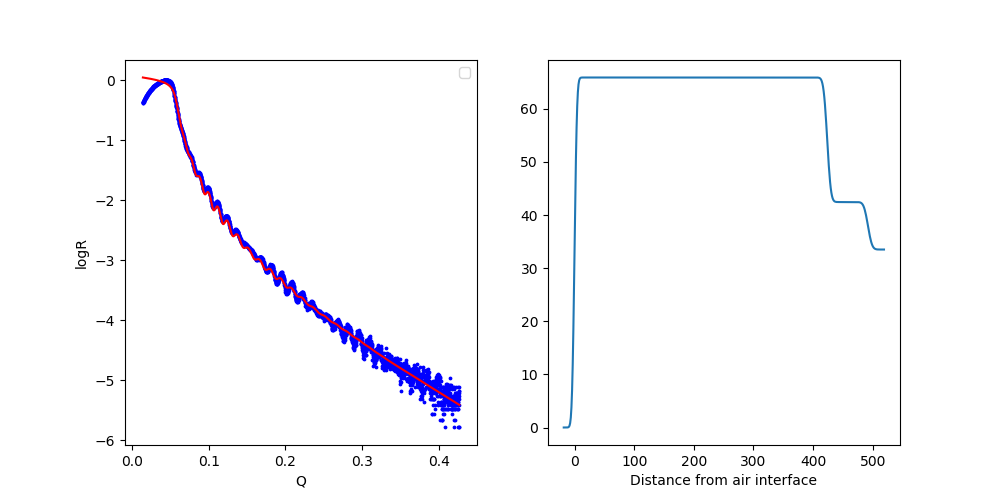

No handles with labels found to put in legend.


Text(0.5, 0, 'Distance from air interface')

In [6]:
# an Objective has a plot method, which is a quick visualisation. You need
# matplotlib installed to create a graph
%matplotlib notebook
fig, ax = plt.subplots(1,2, figsize=(10,5))
plt.sca(ax[0])
fig, ax[0] = objective.plot(fig=fig)
ax[0].legend()
ax[0].set_xlabel('Q')
ax[0].set_ylabel('logR')

ax[1].plot(*structure.sld_profile())
ax[1].set_xlabel('Distance from air interface')

In [17]:
# now lets do a MCMC sampling of the curvefitting system
# first we do 400 samples which we then discard. These samples are
# discarded because the initial chain might not be representative
# of an equilibrated system (i.e. distributed around the mean with
# the correct covariance).
fitter.sample(400)
fitter.reset()
# now do a production run, only saving 1 in 100 samples. This is to
# remove autocorrelation. We save 30 steps, giving a total of 30 * 200
# samples (200 walkers is the default).
res = fitter.sample(30, nthin=100, pool=4)

100%|████████████████████████████████████████████████████████████████████| 3000/3000 [05:40<00:00,  8.80it/s]


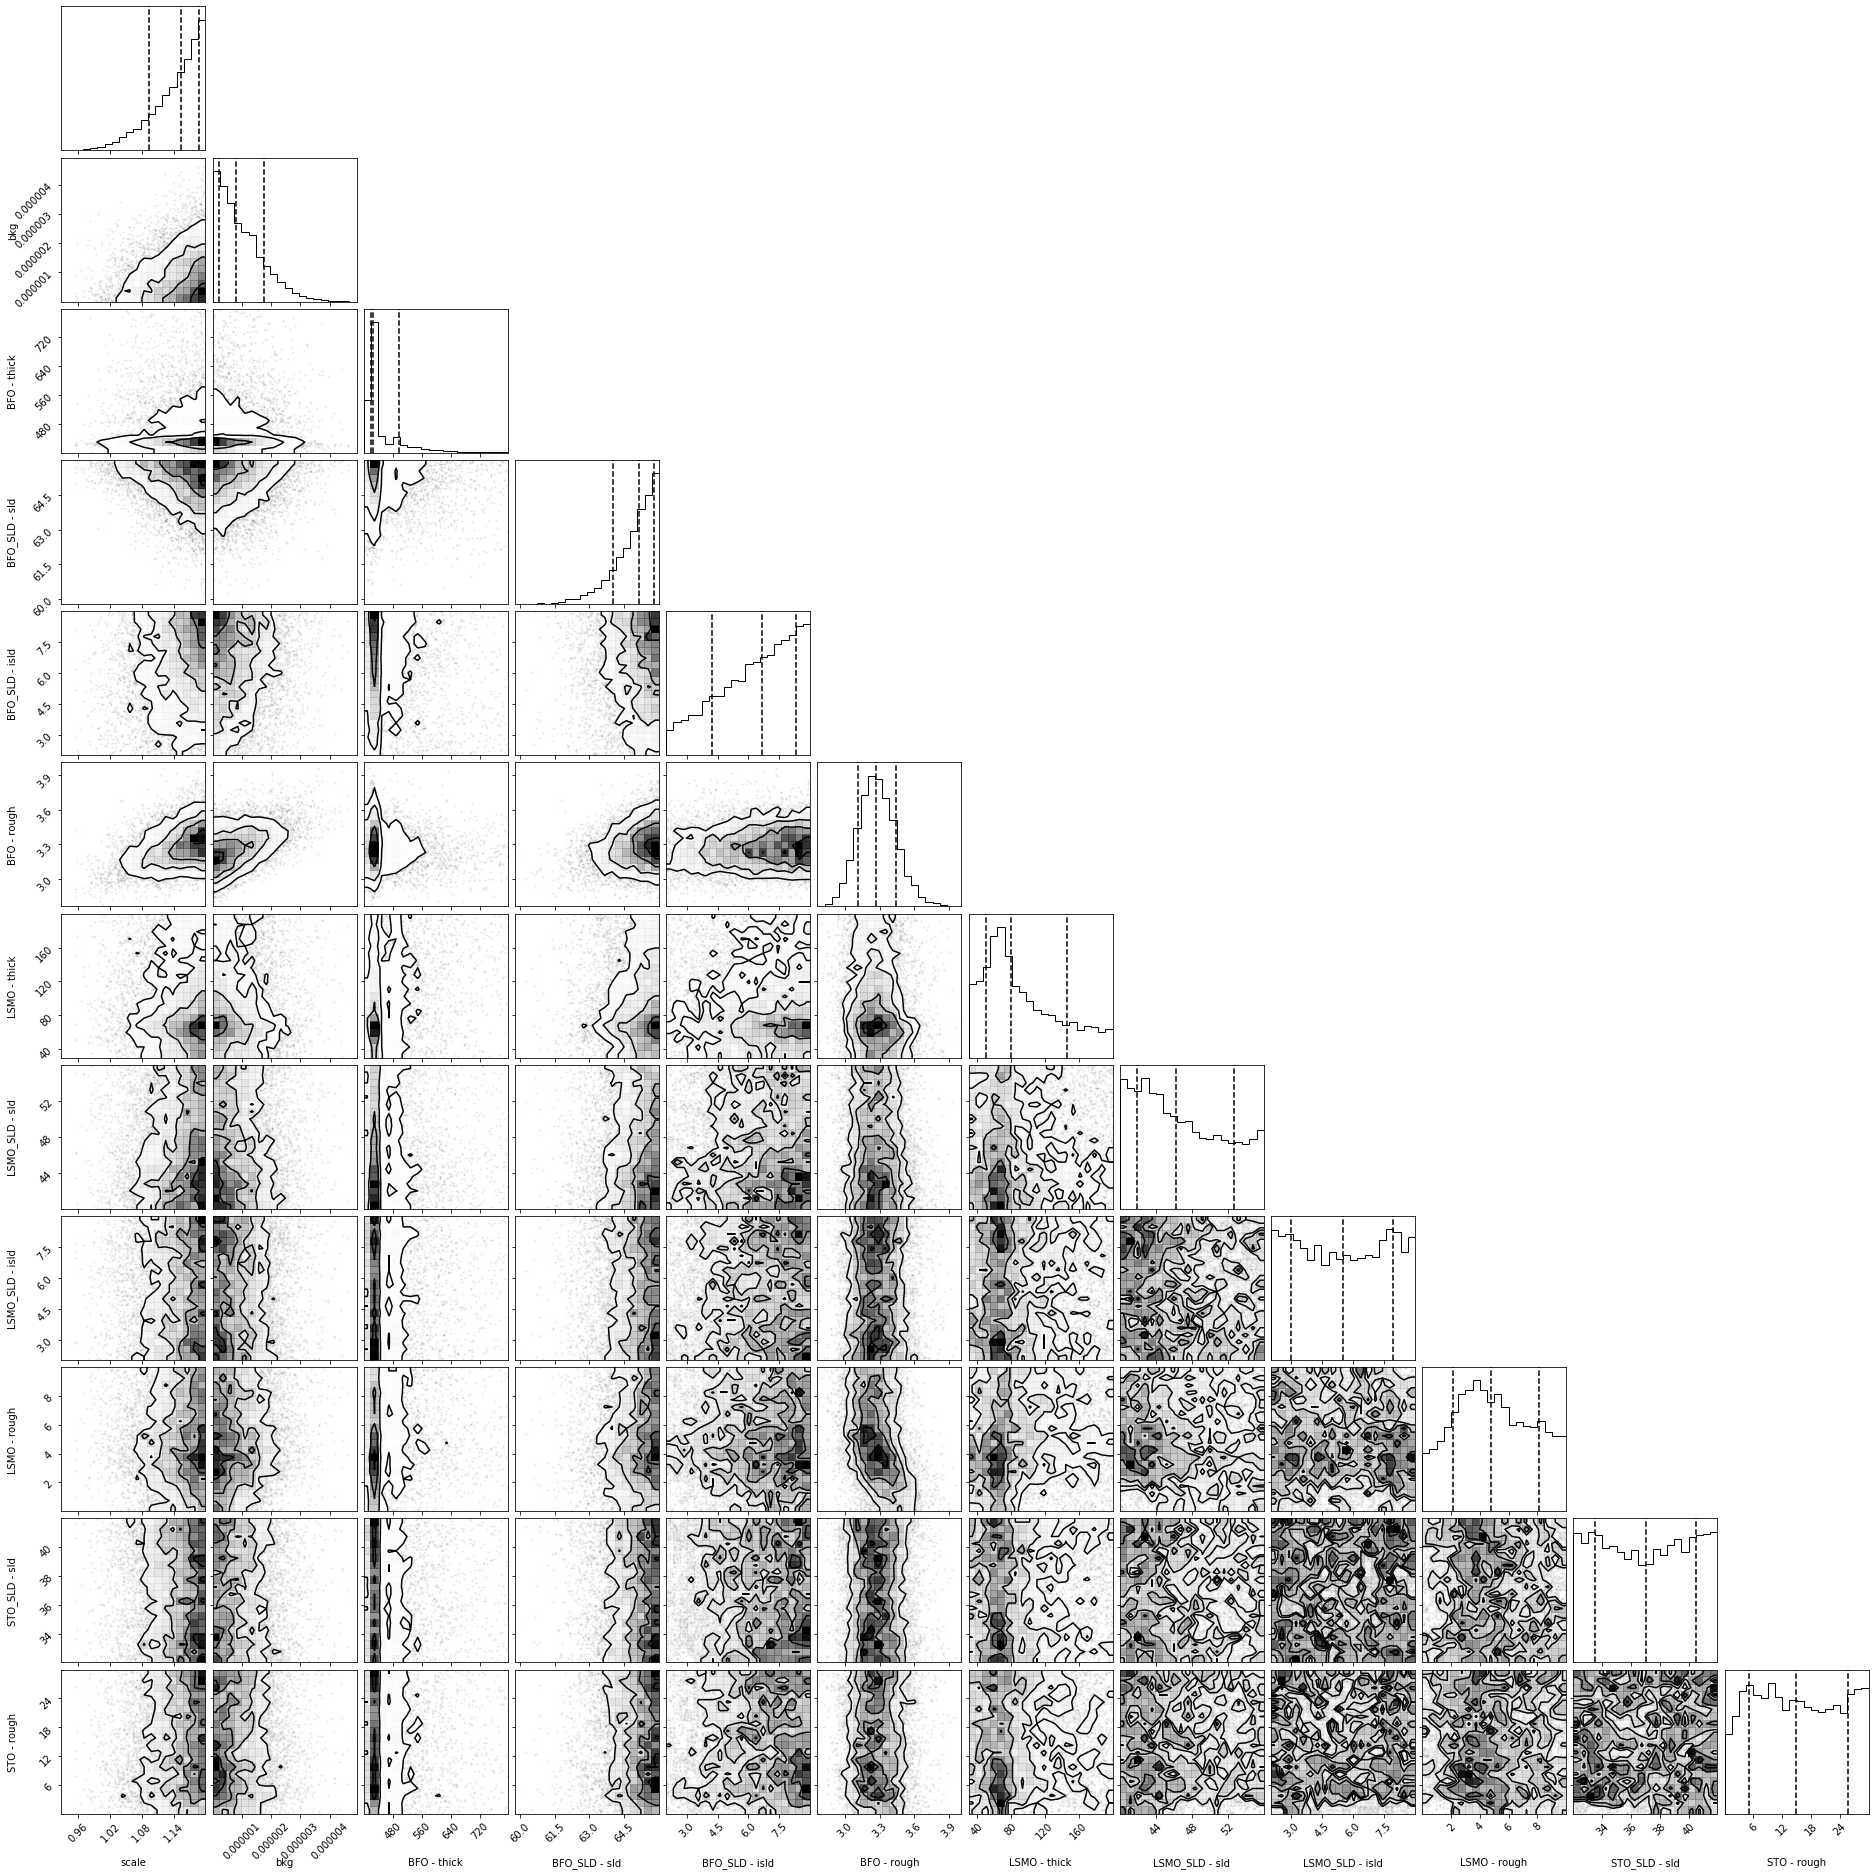

In [18]:
objective.corner();

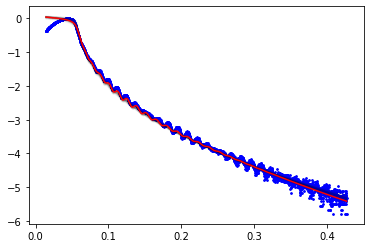

In [19]:
objective.plot(samples=100);

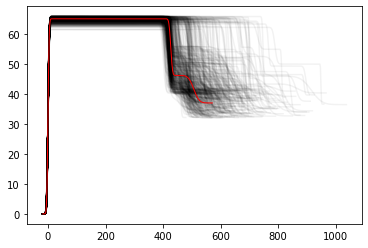

In [21]:
# in a similar manner we can look at the spread in SLD profiles
# consistent with the data. The objective.pgen generator yields
# parameter sets from the chain.

# but first we'll save the parameters in an array.
saved_params = np.array(objective.parameters)

z, true_sld = structure.sld_profile()

for pvec in objective.pgen(ngen=500):
    objective.setp(pvec)
    zs, sld = structure.sld_profile()
    plt.plot(zs, sld, color='k', alpha=0.05)

# put back saved_params
objective.setp(saved_params)

plt.plot(z, true_sld, lw=1, color='r')
#plt.ylim(2.2, 6)

In [1]:
print(objective)

NameError: name 'objective' is not defined